In [1]:
#导入需要使用的三方包
#import the third party packages needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.sans-serif'] = ['Songti SC']
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
#因为文件一个excel只能导出500，所以只能把它们先合起来
#如果使用样本数据集则需要修改
#due to the reason that on excel file exported from Incopat only contains 500 records, so here is to combine them
#together
#need to be modified if using the sample dataset:
df_patent=pd.read_excel('humanoid_robotic_patent_grants.xlsx')
df_github = pd.read_csv('repos_with_readme_clean.csv')
#df_first=pd.read_excel('C:/patent_human_robotic_1.xlsx')
#df_second=pd.read_excel('C:/patent_human_robotic_2.xlsx')
#df_third=pd.read_excel('C:/patent_human_robotic_3.xlsx')
#df_fourth=pd.read_excel('C:/patent_human_robotic_4.xlsx')
#df_fifth=pd.read_excel('C:/patent_human_robotic_5.xlsx')
#df_sixth=pd.read_excel('C:/patent_human_robotic_6.xlsx')
#df_seventh=pd.read_excel('C:/patent_human_robotic_7.xlsx')
#df_eighth=pd.read_excel('C:/patent_human_robotic_8.xlsx')
#df_ninth=pd.read_excel('C:/patent_human_robotic_9.xlsx')
#df_tenth=pd.read_excel('C:/patent_human_robotic_10.xlsx')
#df_eleventh=pd.read_excel('C:/patent_human_robotic_11.xlsx')
#df_twelfth=pd.read_excel('C:/patent_human_robotic_12.xlsx')
#df_patent=pd.concat([df_first, df_second,df_third,df_fourth,df_fifth,df_sixth,df_seventh,df_eighth,df_ninth,df_tenth,df_eleventh,df_twelfth])

In [35]:
#对整体数据导出一个解释行描述，可以在该格进行查询
#overall description of the dataset
df_patent['公开国别（Designated State）'].describe()

count     5612
unique      48
top         中国
freq      2828
Name: 公开国别（Designated State）, dtype: object

# 1.对年份进行可视化
# 1.Visulization to the year

In [36]:
#所使用的列叫做 公开（公告）日 (Publication Date) 在这里会对这一列当中的年份进行可视化
#公开（公告）日 (Publication Date) 的数据为日期类型，年-月-日
#the column used here is "公开（公告）日 (Publication Date)" and the visulization of years will be done here
df_year=df_patent
df_year_date=df_year['公开（公告）日 (Publication Date)']

year_list=[]
for temp in df_year_date:
    year=str(temp)[0:4]
    year_list.append(year)
    pass

df_year['年份']=year_list

df_temp=pd.DataFrame({
    'year':year_list
})

year_count=dict(df_temp['year'].value_counts())

In [37]:
df_year1=df_github
df_year_date1=df_year1['created_at']

year_list1=[]
for temp in df_year_date1:
    year=str(temp)[0:4]
    year_list1.append(year)
    pass

df_year1['年份']=year_list1

df_temp1=pd.DataFrame({
    'year':year_list1
})

year_count1=dict(df_temp1['year'].value_counts())

In [38]:
#year_count是一个字典，如上图所示
#函数sum_adder定义
#year_count is a dictionary like showing above
#the definition of function: sum_adder
def sum_adder(year_count,start_year,end_year):
    sum_=0
    for year in year_count:
        if int(year)>=start_year and int(year)<=end_year:
            temp=year_count[year]
            sum_+=temp
            pass
        pass
    return sum_

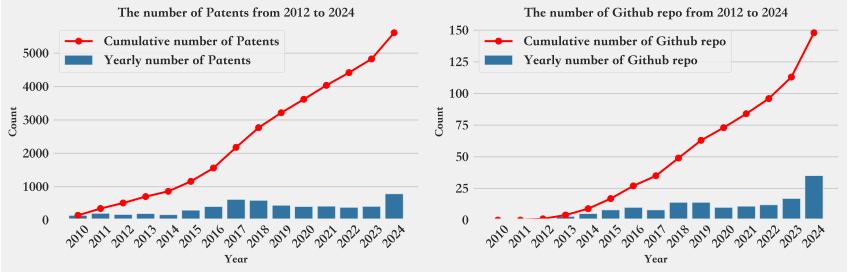

In [39]:
# 设置画布大小，增加一个子图用于绘制 year_counts2 的图
f, ax = plt.subplots(1, 2, figsize=(12, 4))

# 计算2011到2024年的专利数量和累计数量
years = list(range(2010, 2025))  # 生成2011到2024的年份
year_counts = [year_count.get(str(year), 0) for year in years]  # 每年的专利数量
cumulative_counts = [sum_adder(year_count, 2010, year) for year in years]  # 每年的累计数量
year_counts1 = [year_count1.get(str(year), 0) for year in years]  # 每年的专利数量
cumulative_counts1 = [sum_adder(year_count1, 2010, year) for year in years]  # 每年的累计数量
# 子图1：绘制 year_count1 的数据
sns.barplot(
    x=[str(year) for year in years],  # X轴为年份（字符串格式）
    y=year_counts,  # 每年的专利数量
    color='#1f77b4',
    ax=ax[0],# 设置柱状图颜色
    label='Yearly number of Patents'  # 添加图例标签
)

ax[0].plot(
    [str(year) for year in years],  # X轴为年份（字符串格式）
    cumulative_counts,  # 每年的累计数量
    color='red',  # 折线图颜色
    marker='o',  # 添加点标记
    label='Cumulative number of Patents',  # 添加图例标签
    linewidth=2
)

# 设置子图1的标题和轴标签
ax[0].set_title('The number of Patents from 2012 to 2024', fontsize=14)
ax[0].set_xlabel('Year', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)
ax[0].set_xticklabels([str(year) for year in years], rotation=45)
ax[0].legend()


# 子图1：绘制 year_count1 的数据
sns.barplot(
    x=[str(year) for year in years],  # X轴为年份（字符串格式）
    y=year_counts1,  # 每年的专利数量
    color='#1f77b4',
    ax=ax[1],# 设置柱状图颜色
    label='Yearly number of Github repo'  # 添加图例标签
)

ax[1].plot(
    [str(year) for year in years],  # X轴为年份（字符串格式）
    cumulative_counts1,  # 每年的累计数量
    color='red',  # 折线图颜色
    marker='o',  # 添加点标记
    label='Cumulative number of Github repo',  # 添加图例标签
    linewidth=2
)

# 设置子图1的标题和轴标签
ax[1].set_title('The number of Github repo from 2012 to 2024', fontsize=14)
ax[1].set_xlabel('Year', fontsize=12)
ax[1].set_ylabel('Count', fontsize=12)
ax[1].set_xticklabels([str(year) for year in years], rotation=45)
ax[1].legend()

# 调整布局，避免重叠
plt.tight_layout()
plt.savefig('time.png',dpi=300)

In [7]:
year_count

{'2024': 785,
 '2017': 618,
 '2018': 591,
 '2019': 446,
 '2021': 418,
 '2023': 409,
 '2020': 404,
 '2016': 401,
 '2022': 381,
 '2015': 297,
 '2011': 204,
 '2013': 192,
 '2012': 166,
 '2014': 158,
 '2010': 142}

In [8]:
year_count1

{'2024': 35,
 '2023': 17,
 '2019': 14,
 '2018': 14,
 '2022': 12,
 '2021': 11,
 '2020': 10,
 '2016': 10,
 '2015': 8,
 '2017': 8,
 '2014': 5,
 '2013': 3,
 '2012': 1}

# 2.对公开国别进行可视化
# 2.Visulization of top countries

In [41]:
#所使用的列叫做 公开国别
#the column used here is "公开国别（Designated State）"
df_country=df_patent
df_country_single=df_country['公开国别（Designated State）']

#根据这里来查看专利的公开国别，对排名靠前的进行可视化
#use the function to see the top countries here
df_country_single.value_counts()

中国                2828
美国                 616
日本                 448
韩国                 352
世界知识产权组织(WIPO)     279
欧洲专利局(EPO)         217
印度                 185
德国                 132
法国                  54
加拿大                 54
澳大利亚                53
俄罗斯                 49
新加坡                 42
英国                  39
中国台湾                33
西班牙                 29
巴西                  28
墨西哥                 26
欧盟                  17
马来西亚                16
新西兰                 16
泰国                  15
中国香港                13
意大利                 10
印度尼西亚                7
丹麦                   7
波兰                   5
菲律宾                  4
希腊                   4
匈牙利                  4
伊朗                   4
土耳其                  3
越南                   3
阿根廷                  2
哥伦比亚                 2
葡萄牙                  2
奥地利                  2
以色列                  2
非洲知识产权组织(OAPI)       1
乌克兰                  1
南非                   1
卢森堡                  1
沙特阿拉伯                1
罗马尼亚       

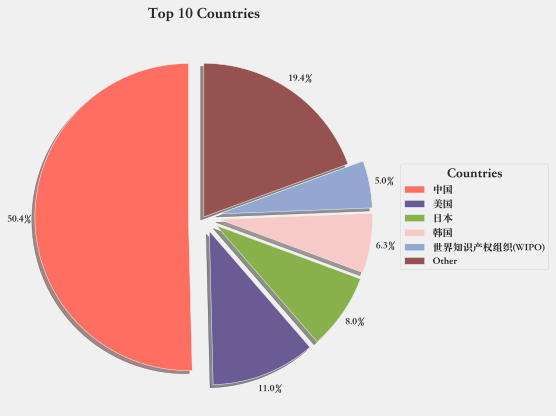

In [42]:
# 进行画图，采用饼图
# Drawing using the pie plot
f, ax = plt.subplots(1, 1, figsize=(10, 6))  # 调整figsize让图表更清晰

# 计算前10个国家的专利数量
top10 = df_country_single.value_counts().head()

# 动态获取标签（国家名称）和数量
labels1 = top10.index.tolist()  # 国家名称
sizes1 = top10.values.tolist()  # 对应的专利数量

# 其他国家的数量（补充进"Other"类别）
other_count = df_country_single.value_counts()[5:].sum()
if other_count > 0:
    labels1.append("Other")
    sizes1.append(other_count)
explode = [0.1 if i < 5 else 0 for i in range(len(labels1))]  # 仅让前五个分开突出显示

# 自定义颜色
colors = ['#FF6F61', '#6B5B95', '#88B04B', '#F7CAC9', '#92A8D1',
          '#955251', '#B565A7', '#009B77', '#DD4124', '#45B8AC', '#EFC050']

# 绘制饼图
wedges, texts, autotexts = ax.pie(
    sizes1,
    labels=None,  # 不直接显示标签，改用图例
    autopct='%1.1f%%',
    pctdistance=1.1,  # 控制百分比文本距离中心的距离
    shadow=True,
    explode=explode,
    startangle=90,  # 让饼图从顶部开始
    colors=colors,  # 使用自定义的颜色列表
    textprops={'fontsize': 10}  # 控制百分比文本的字体大小
)

# 设置标题
ax.set_title('Top 10 Countries', fontsize=16)

# 添加图例
ax.legend(
    wedges, labels1,
    title="Countries",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),  # 将图例放置于右侧
    fontsize=10  # 调整图例字体大小
)

# 调整自动文本的字体大小
for autotext in autotexts:
    autotext.set_fontsize(10)

plt.tight_layout()  # 自动调整布局避免重叠
plt.show()

In [43]:
df_country1 = df_github['country']
df_country1.value_counts()

United States of America                   18
Italy                                      11
Germany                                    10
China                                       7
United Kingdom                              5
France                                      4
Japan                                       3
Canada                                      3
Indonesia                                   3
Switzerland                                 3
51 Prospect Street, New Haven, CT 06520     2
Taiwan, China                               2
JAPAN                                       2
Australia                                   2
Greece                                      2
Bangladesh                                  2
Iran                                        2
Belgium                                     1
Italia                                      1
Prague                                      1
Saudi Arabia                                1
Polkadot && Ethereum && IPFS      

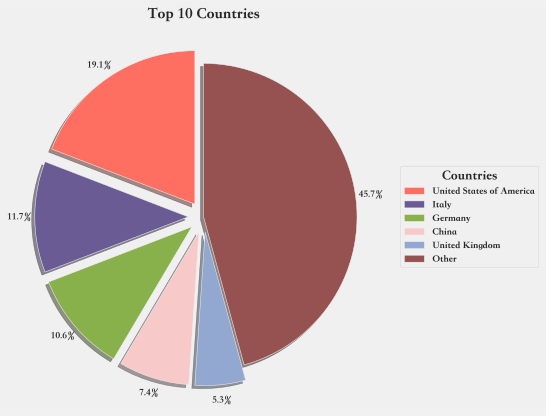

In [44]:
# 进行画图，采用饼图
# Drawing using the pie plot
f, ax = plt.subplots(1, 1, figsize=(10, 6))  # 调整figsize让图表更清晰

# 计算前10个国家的专利数量
top10 = df_country1.value_counts().head(5)

# 动态获取标签（国家名称）和数量
labels1 = top10.index.tolist()  # 国家名称
sizes1 = top10.values.tolist()  # 对应的专利数量

# 其他国家的数量（补充进"Other"类别）
other_count = df_country1.value_counts()[5:].sum()
if other_count > 0:
    labels1.append("Other")
    sizes1.append(other_count)
explode = [0.1 if i < 5 else 0 for i in range(len(labels1))]  # 仅让前五个分开突出显示

# 自定义颜色
colors = ['#FF6F61', '#6B5B95', '#88B04B', '#F7CAC9', '#92A8D1',
          '#955251', '#B565A7', '#009B77', '#DD4124', '#45B8AC', '#EFC050']

# 绘制饼图
wedges, texts, autotexts = ax.pie(
    sizes1,
    labels=None,  # 不直接显示标签，改用图例
    autopct='%1.1f%%',
    pctdistance=1.1,  # 控制百分比文本距离中心的距离
    shadow=True,
    explode=explode,
    startangle=90,  # 让饼图从顶部开始
    colors=colors,  # 使用自定义的颜色列表
    textprops={'fontsize': 10}  # 控制百分比文本的字体大小
)

# 设置标题
ax.set_title('Top 10 Countries', fontsize=16)

# 添加图例
ax.legend(
    wedges, labels1,
    title="Countries",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),  # 将图例放置于右侧
    fontsize=10  # 调整图例字体大小
)

# 调整自动文本的字体大小
for autotext in autotexts:
    autotext.set_fontsize(10)

plt.tight_layout()  # 自动调整布局避免重叠
plt.show()

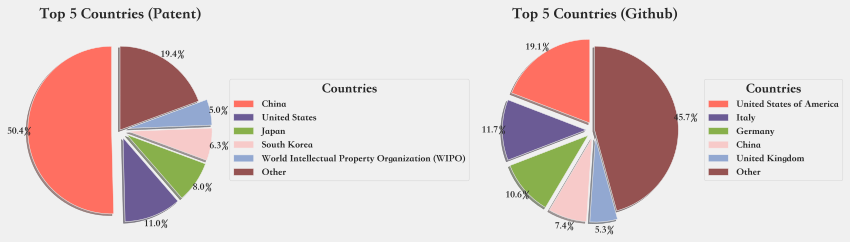

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

# 创建画布和子图
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # 一行两列，调整画布大小

# 自定义颜色
colors = ['#FF6F61', '#6B5B95', '#88B04B', '#F7CAC9', '#92A8D1',
          '#955251', '#B565A7', '#009B77', '#DD4124', '#45B8AC', '#EFC050']

# 第一个饼图：df_country_single
top10_single = df_country_single.value_counts().head(5)

# 定义中文到英文的映射字典
translation_dict = {
    '中国': 'China',
    '美国': 'United States',
    '日本': 'Japan',
    '韩国': 'South Korea',
    '世界知识产权组织(WIPO)': 'World Intellectual Property Organization (WIPO)',
    'Other': 'Other'  # 确保 "Other" 保持不变
}

# 将中文国家名称替换为英文
top10_single = top10_single.rename(index=translation_dict)

# 动态获取标签（国家名称）和数量
labels_single = top10_single.index.tolist()
sizes_single = top10_single.values.tolist()

# 其他国家的数量（补充进"Other"类别）
other_count_single = df_country_single.value_counts()[5:].sum()
if other_count_single > 0:
    labels_single.append("Other")
    sizes_single.append(other_count_single)

explode_single = [0.1 if i < 5 else 0 for i in range(len(labels_single))]

wedges1, texts1, autotexts1 = ax1.pie(
    sizes_single,
    labels=None,
    autopct='%1.1f%%',
    pctdistance=1.1,
    shadow=True,
    explode=explode_single,
    startangle=90,
    colors=colors,
    textprops={'fontsize': 10}
)

ax1.set_title('Top 5 Countries (Patent)', fontsize=16)
ax1.legend(
    wedges1, labels_single,
    title="Countries",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),
    fontsize=10
)

for autotext in autotexts1:
    autotext.set_fontsize(10)

# 第二个饼图：df_country1
top10_1 = df_country1.value_counts().head(5)
labels_1 = top10_1.index.tolist()
sizes_1 = top10_1.values.tolist()

other_count_1 = df_country1.value_counts()[5:].sum()
if other_count_1 > 0:
    labels_1.append("Other")
    sizes_1.append(other_count_1)
explode_1 = [0.1 if i < 5 else 0 for i in range(len(labels_1))]

wedges2, texts2, autotexts2 = ax2.pie(
    sizes_1,
    labels=None,
    autopct='%1.1f%%',
    pctdistance=1.1,
    shadow=True,
    explode=explode_1,
    startangle=90,
    colors=colors,
    textprops={'fontsize': 10}
)

ax2.set_title('Top 5 Countries (Github)', fontsize=16)
ax2.legend(
    wedges2, labels_1,
    title="Countries",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),
    fontsize=10
)

for autotext in autotexts2:
    autotext.set_fontsize(10)

# 调整布局
plt.tight_layout()
plt.savefig('image/top countries.png', dpi=300)

# 3.对申请人进行可视化
# 3.Visulization of assignees

In [14]:
#所使用的列叫做 申请人 (Applicant)
#the column used here is assignees
df_asignee=df_patent
df_asignee_single=df_asignee['申请人 (Applicant)']

#需要对申请人进行一定处理
#pre-processing to the data of assignees
asignee_dict=dict()
for people in df_asignee_single:
    people_temp_list=str(people).split(';')
    for single_string in people_temp_list:
        temp_string=single_string.replace('','')
        temp_string=temp_string.replace('','')
        try:
            count=asignee_dict[temp_string]
            count+=1
            asignee_dict.update({temp_string:count})
        except:
            asignee_dict[temp_string]=1
        finally:
            continue
        pass
    pass

sorted_dict_asignee = sorted(asignee_dict.items(), key=lambda item: item[1])
sorted_dict_asignee

[('The Regents Of The University Of Colorado,  A Body Corporate', 1),
 ('Avridh Tech Inc', 1),
 ('广州德恒汽车装备科技有限公司', 1),
 ('四川虹微技术有限公司', 1),
 ('S E A College Of Engineering Technology', 1),
 (' Usha Desai', 1),
 ('季灿人工智能实验室(深圳)有限公司', 1),
 ('威泊(上海)新能源科技股份有限公司', 1),
 ('宁波数字孪生(东方理工)研究院', 1),
 (' 宁波东方理工大学(暂名)', 1),
 ('上海期智研究院', 1),
 ('辰星(天津)自动化设备有限公司', 1),
 ('北京伟景智能科技有限公司', 1),
 ('南通天承光电科技有限公司', 1),
 ('Lee Jeong Yong', 1),
 ('Kim Jin Seok', 1),
 ('广州小鹏汽车科技有限公司', 1),
 ('杭州申昊科技股份有限公司', 1),
 ('National Institute Of Technology Jamshedpur', 1),
 ('Yantai University', 1),
 ('华中农业大学', 1),
 ('长坂(扬州)机器人科技有限公司', 1),
 ('Hotberry Llc', 1),
 ('具身智人(北京)科技有限公司', 1),
 ('Dayananda Sagar College Of Engineering', 1),
 ('深圳市威远精密技术有限公司', 1),
 ('杭州宇▲樹▼科技有限公司', 1),
 ('上海优理奇智能科技有限公司', 1),
 ('Awinnovation Srls', 1),
 ('海信集团控股股份有限公司', 1),
 ('Universidad Técnica Federico Santa María', 1),
 ('Ems Group S P A', 1),
 ('卓益得人形机器人(上海)有限公司', 1),
 ('溧阳智行飞远检测技术有限公司', 1),
 ('长沙银汉空间科技有限公司', 1),
 ('Riccio Group S R L', 1),
 ('广州市

# 4.对IPC进行可视化
# 4.Visulization to IPC

In [15]:
# Assuming df_patent is the DataFrame containing the IPC codes in a column named 'IPC'
df_ipc = df_patent
df_ipc_single = df_ipc['IPC'].dropna()

BigIpcList = []
index_fault = 0

# Iterate through each row in the 'IPC' column
for ipcList in df_ipc_single:
    try:
        # Split the IPC codes by semicolon to handle multiple codes in a single cell
        tempList = ipcList.split(';')
    except Exception as e:
        # If there's an error (e.g., NaN or unexpected format), append 'empty' and log the error
        BigIpcList.append(['empty'])
        print(f"Error at index {index_fault + 1}: {e}")
        index_fault += 1
        continue

    receiveList = []
    # Iterate through each IPC code in the split list
    for ipcSingle in tempList:
        # Extract the first 11 characters of the IPC code
        fourDigits = ipcSingle[0:11]
        receiveList.append(fourDigits)

    # Append the processed list of IPC codes to the main list
    BigIpcList.append(receiveList)
    index_fault += 1

In [16]:
#用来看IPC的数量，函数当中的BigCpcList应该在使用时应写为BigIpcList
#to see top IPCs, the BigCpcList in the function is BigIpcList actually
def counting_IPC(BigCpcList):
    df_temp=pd.DataFrame({
        'ipc':[]
    })
    for index in range(len(BigCpcList)):
        for cpcSingle in BigCpcList[index]:
            df_new=pd.DataFrame({
                'ipc':cpcSingle
            },index=[index])
            #append在新版本的pandas当中被弃用
            #append is abondoned in the new version of pandas
            #df_temp=df_temp.append(df_new)
            
            df_temp=pd.concat([df_temp,df_new],ignore_index=True)
            pass
        pass
    print('一共有多少条数据：{}'.format(len(df_temp)))
    print(dict(df_temp['ipc'].value_counts()))
    return df_temp

In [17]:
df_ipc=counting_IPC(BigIpcList)

一共有多少条数据：13085
{'B25J9/16': 778, 'B25J11/00': 444, ' B25J11/00': 407, ' B25J9/16': 398, 'B62D57/032': 347, ' B25J19/00': 338, 'B25J19/00': 255, ' B25J9/00': 229, ' B25J13/08': 228, 'B25J9/00': 224, ' B25J5/00': 210, ' B25J19/02': 197, 'B25J15/00': 192, 'B25J17/00': 189, ' B62D57/032': 184, ' B25J17/00': 183, 'B25J5/00': 156, ' B25J13/00': 150, ' B25J17/02': 145, ' B25J9/10': 106, ' B25J19/06': 103, ' B25J9/12': 101, 'B25J17/02': 101, ' G06N3/00': 95, 'B25J15/08': 94, 'B25J13/08': 94, ' B25J18/00': 90, 'G05D1/02': 87, 'B25J19/06': 77, 'B25J9/10': 76, ' G05D1/02': 74, ' G10L15/22': 72, 'B25J13/00': 70, ' G06F3/01': 69, ' B25J15/00': 68, 'G10L15/22': 59, 'G05B13/04': 55, ' B25J15/02': 53, 'G06F3/01': 52, ' B25J15/10': 52, ' B25J9/08': 51, ' G06K9/00': 48, 'B25J18/00': 47, ' B25J15/08': 44, ' B25J9/14': 43, ' G06N3/08': 38, ' G06F3/16': 35, 'G06F19/00': 33, 'G05D1/00': 32, ' G06K9/62': 32, ' G06N20/00': 31, 'B25J9/08': 30, 'B25J9/06': 30, 'G05B19/042': 30, ' A61H3/00': 30, 'G06K9/00': 30, 

In [18]:
df_ipc.head(10)

,ipc
0,G05D1/00
1,G06F40/20
2,G06V10/22
3,G06V10/82
4,G06V20/50
5,G10L15/16
6,G10L15/22
7,H04L67/125
8,B25J9/16
9,B25J13/06


In [19]:
import ast
df_github['topics'] = df_github['topics'].apply(ast.literal_eval)

In [20]:
from nltk.stem import PorterStemmer
from collections import Counter
import nltk
# 初始化词干提取器
stemmer = PorterStemmer()

# 提取所有主题并展开为一个列表
all_topics = [topic for sublist in df_github['topics'] for topic in sublist]
# 拆分包含连字符的单词
split_topics = []
for topic in all_topics:
    # 使用 split('-') 拆分单词
    split_words = topic.split('-')
    # 将拆分后的单词添加到列表中
    split_topics.extend(split_words)
all_topics=split_topics

In [21]:
# 对每个主题进行分词并提取词干
stemmed_topics = []
for topic in all_topics:
    # 分词
    words = nltk.word_tokenize(topic)
    # 提取词干
    stemmed_words = [stemmer.stem(word) for word in words]
    # 将词干化的单词重新组合为字符串
    stemmed_topic = ' '.join(stemmed_words)
    stemmed_topics.append(stemmed_topic)

# 统计词频
topic_freq = Counter(stemmed_topics)

Text(0, 0.5, 'Frequency')

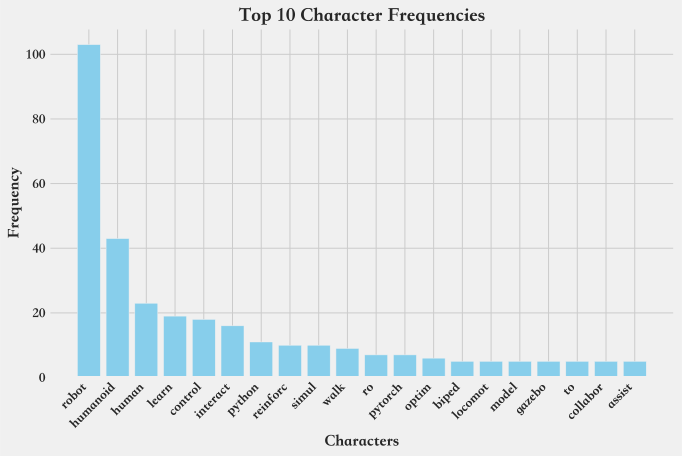

In [22]:
# 提取前十个词频
top_10 = topic_freq.most_common(20)

# 分离字符和频率
chars, frequencies = zip(*top_10)

# 绘制柱状图
plt.figure(figsize=(10, 6))
plt.bar(chars, frequencies, color='skyblue')

# 添加标题和标签
plt.title('Top 10 Character Frequencies')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Characters')
plt.ylabel('Frequency')


# 1.Visualize the year

In [23]:
df_year1=df_github
df_year_date1=df_year1['created_at']

year_list1=[]
for temp in df_year_date1:
    year=str(temp)[0:4]
    year_list1.append(year)
    pass

df_year1['年份']=year_list1

df_temp1=pd.DataFrame({
    'year':year_list1
})

year_count1=dict(df_temp1['year'].value_counts())

In [24]:
#year_count是一个字典，如上图所示

def sum_adder(year_count,start_year,end_year):
    sum_=0
    for year in year_count:
        if int(year)>=start_year and int(year)<=end_year:
            temp=year_count[year]
            sum_+=temp
            pass
        pass
    return sum_

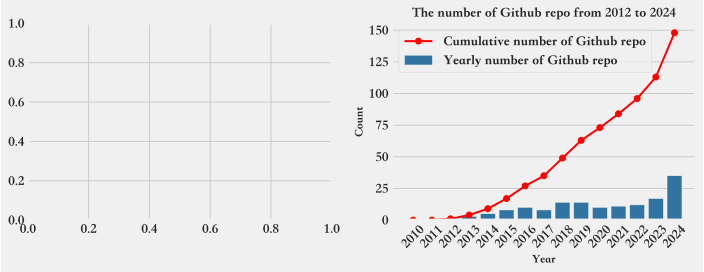

In [25]:
# 设置画布大小，增加一个子图用于绘制 year_counts2 的图
f, ax = plt.subplots(1, 2, figsize=(10, 4))

# 计算2011到2024年的专利数量和累计数量
years = list(range(2010, 2025))  # 生成2011到2024的年份
year_counts1 = [year_count1.get(str(year), 0) for year in years]  # 每年的专利数量
cumulative_counts1 = [sum_adder(year_count1, 2010, year) for year in years]  # 每年的累计数量


# 子图1：绘制 year_count1 的数据
sns.barplot(
    x=[str(year) for year in years],  # X轴为年份（字符串格式）
    y=year_counts1,  # 每年的专利数量
    color='#1f77b4',
    ax=ax[1],# 设置柱状图颜色
    label='Yearly number of Github repo'  # 添加图例标签
)

ax[1].plot(
    [str(year) for year in years],  # X轴为年份（字符串格式）
    cumulative_counts1,  # 每年的累计数量
    color='red',  # 折线图颜色
    marker='o',  # 添加点标记
    label='Cumulative number of Github repo',  # 添加图例标签
    linewidth=2
)

# 设置子图1的标题和轴标签
ax[1].set_title('The number of Github repo from 2012 to 2024', fontsize=14)
ax[1].set_xlabel('Year', fontsize=12)
ax[1].set_ylabel('Count', fontsize=12)
ax[1].set_xticklabels([str(year) for year in years], rotation=45)
ax[1].legend()

# 调整布局，避免重叠
plt.tight_layout()
plt.show()

In [26]:
df_language=df_github
df_language['language'] = df_language['language'].fillna("unknown")
df_language_single=df_language['language']
df_language_single.value_counts()

Python              57
C++                 32
unknown             23
MATLAB               8
Jupyter Notebook     5
C                    5
Shell                3
Matlab               3
CMake                3
HTML                 2
Makefile             1
Arduino              1
C#                   1
Rust                 1
Julia                1
TeX                  1
Lua                  1
Name: language, dtype: int64

# The distribution of Programming Languages

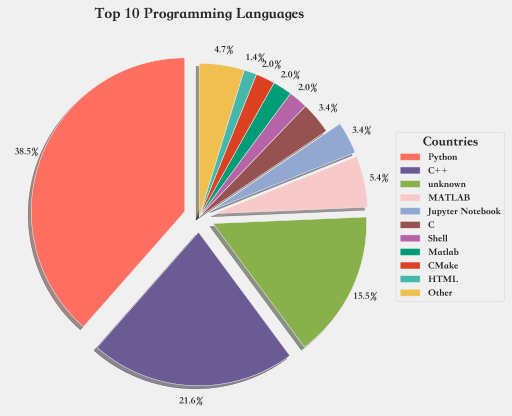

In [27]:
# 进行画图，采用饼图
# Drawing using the pie plot
f, ax = plt.subplots(1, 1, figsize=(10, 6))  # 调整figsize让图表更清晰

# 计算前10个国家的专利数量
top10 = df_language_single.value_counts().head(10)

# 动态获取标签（国家名称）和数量
labels1 = top10.index.tolist()  # 国家名称
sizes1 = top10.values.tolist()  # 对应的专利数量

# 其他国家的数量（补充进"Other"类别）
other_count = df_language_single.value_counts()[10:].sum()
if other_count > 0:
    labels1.append("Other")
    sizes1.append(other_count)
explode = [0.1 if i < 5 else 0 for i in range(len(labels1))]  # 仅让前五个分开突出显示

# 自定义颜色
colors = ['#FF6F61', '#6B5B95', '#88B04B', '#F7CAC9', '#92A8D1',
          '#955251', '#B565A7', '#009B77', '#DD4124', '#45B8AC', '#EFC050']

# 绘制饼图
wedges, texts, autotexts = ax.pie(
    sizes1,
    labels=None,  # 不直接显示标签，改用图例
    autopct='%1.1f%%',
    pctdistance=1.1,  # 控制百分比文本距离中心的距离
    shadow=True,
    explode=explode,
    startangle=90,  # 让饼图从顶部开始
    colors=colors,  # 使用自定义的颜色列表
    textprops={'fontsize': 10}  # 控制百分比文本的字体大小
)

# 设置标题
ax.set_title('Top 10 Programming Languages', fontsize=16)

# 添加图例
ax.legend(
    wedges, labels1,
    title="Countries",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),  # 将图例放置于右侧
    fontsize=10  # 调整图例字体大小
)

# 调整自动文本的字体大小
for autotext in autotexts:
    autotext.set_fontsize(10)

plt.tight_layout()  # 自动调整布局避免重叠
plt.show()

# The distribution of stars

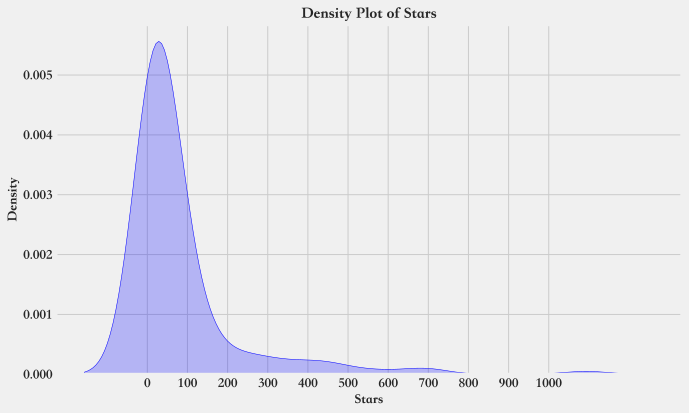

In [185]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_github['stars'], color='blue', fill=True)
plt.title("Density Plot of Stars", fontsize=16)
plt.xlabel("Stars", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.xticks(np.arange(0, 1001, 100))
plt.show()

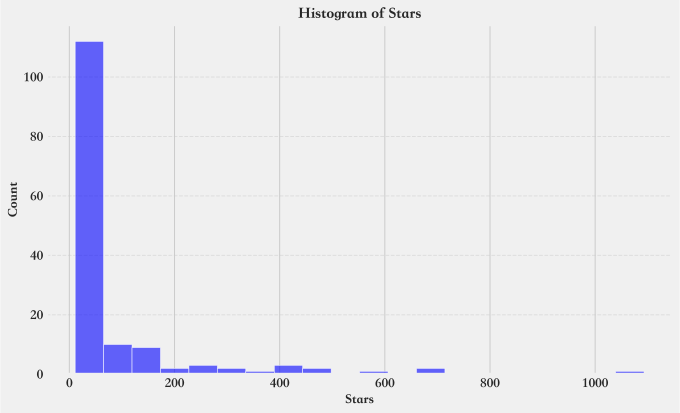

In [227]:
# 绘制柱状图
plt.figure(figsize=(10, 6))
sns.histplot(data=df_github['stars'],
             bins=20,           # 柱子数量（根据数据范围调整）
             color='blue',      # 柱子颜色
             alpha=0.6,         # 透明度
             edgecolor='white') # 柱子边框


# 标题和标签
plt.title("Histogram of Stars", fontsize=16)
plt.xlabel("Stars", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)  # 横向网格线
plt.savefig('stars.png', dpi=300)

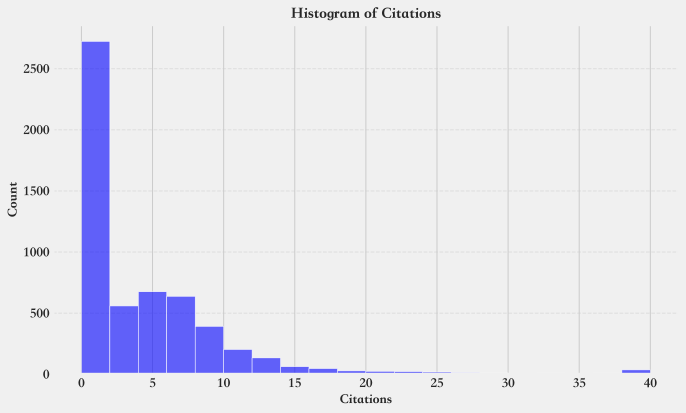

In [228]:
# 绘制柱状图
plt.figure(figsize=(10, 6))
sns.histplot(data=df_citation['引证次数(Number of Citations)'].clip(upper=40).fillna(0),
             bins=20,           # 柱子数量（根据数据范围调整）
             color='blue',      # 柱子颜色
             alpha=0.6,         # 透明度
             edgecolor='white') # 柱子边框


# 标题和标签
plt.title("Histogram of Citations", fontsize=16)
plt.xlabel("Citations", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)  # 横向网格线
plt.savefig('citations.png', dpi=300)